In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
barca_df = pd.read_csv("barca_players_df.csv")
non_barca_df = pd.read_csv("new_non_barca.csv")

In [38]:
barca_df['isBarca'] = 1


In [39]:
barca_df

,Player,Nation,Pos,Age,PrgC,PrgP,PrgR,G+A,xG+xAG,Min,Squad,isBarca
0,Ronald Araújo,uy URU,DF,26.0,6,49,3,2,0.17,754,Barcelona,1
1,Alejandro Balde,es ESP,DF,21.0,107,93,246,4,0.15,2284,Barcelona,1
2,Marc Bernal,es ESP,MF,18.0,0,8,2,0,0.03,242,Barcelona,1
3,Marc Casado,es ESP,MF,21.0,12,107,24,4,0.13,1611,Barcelona,1
4,Andreas Christensen,dk DEN,DF,29.0,1,15,1,0,0.03,254,Barcelona,1
5,Pau Cubarsí,es ESP,DF,18.0,26,191,6,3,0.08,2618,Barcelona,1
6,Sergi Dominguez,es ESP,DF,20.0,0,13,1,0,0.00,172,Barcelona,1
7,Ansu Fati,es ESP,FW,22.0,7,6,32,0,0.44,233,Barcelona,1
8,Héctor Fort,es ESP,DF,18.0,14,26,33,0,0.17,585,Barcelona,1
9,Eric García,es ESP,"DF,MF",24.0,18,109,22,5,0.18,1566,Barcelona,1


In [40]:
non_barca_df

,Player,Nation,Pos,Age,PrgC,PrgP,PrgR,G+A,xG+xAG,Min,Squad,isBarca
0,Tammy Abraham,eng ENG,FW,27.0,8,26,69,7,0.70,1183,Milan,0
1,Lucien Agoume,fr FRA,MF,23.0,29,135,23,4,0.14,2114,Sevilla,0
2,Bradley Barcola,fr FRA,FW,22.0,137,96,374,24,0.97,2181,Paris S-G,0
3,Nicolò Barella,it ITA,MF,28.0,63,235,133,9,0.24,2493,Inter,0
4,Enzo Barrenechea,ar ARG,MF,24.0,21,126,16,3,0.09,2191,Valencia,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Granit Xhaka,ch SUI,MF,32.0,42,318,72,9,0.17,2888,Leverkusen,0
109,Mattia Zaccagni,it ITA,FW,29.0,91,114,264,14,0.37,2686,Lazio,0
110,Andre-Frank Zambo Anguissa,cm CMR,MF,29.0,24,144,119,10,0.22,2852,Napoli,0
111,Martín Zubimendi,es ESP,MF,26.0,38,195,43,3,0.11,2962,Real Sociedad,0


In [41]:
all_players = pd.concat([barca_df, non_barca_df], ignore_index=True)
all_players = all_players.sample(frac=1, random_state=42).reset_index(drop=True)
all_players.to_csv("new_all_players.csv", index=False)

In [42]:
print(f"Total players: {len(all_players)}")
print(f"Barca players: {all_players['isBarca'].sum()}")
print(f"Non-Barca players: {(all_players['isBarca'] == 0).sum()}")

Total players: 141
Barca players: 28
Non-Barca players: 113


In [43]:
numeric_features = ['Age', 'PrgC', 'PrgP', 'PrgR', 'G+A', 'xG+xAG', 'Min']
X = all_players[numeric_features].copy()
X

,Age,PrgC,PrgP,PrgR,G+A,xG+xAG,Min
0,24.0,60,71,197,14,0.52,2177
1,21.0,15,128,33,1,0.05,1451
2,28.0,63,235,133,9,0.24,2493
3,26.0,44,176,32,7,0.17,2504
4,36.0,72,199,93,5,0.16,2396
...,...,...,...,...,...,...,...
136,28.0,25,88,56,0,0.17,1564
137,26.0,15,97,40,7,0.30,1155
138,22.0,31,78,108,11,0.68,1252
139,26.0,150,140,386,34,1.04,2907


In [44]:
# Engineer per-90-minute features (Barca style indicators)
X['Progressive_per_min'] = X['PrgP'] / (X['Min'] / 90)
X['Creative_per_min'] = X['PrgC'] / (X['Min'] / 90)
X['Runs_per_min'] = X['PrgR'] / (X['Min'] / 90)
X['Goals_per_min'] = X['G+A'] / (X['Min'] / 90)
X

,Age,PrgC,PrgP,PrgR,G+A,xG+xAG,Min,Progressive_per_min,Creative_per_min,Runs_per_min,Goals_per_min
0,24.0,60,71,197,14,0.52,2177,2.935232,2.480478,8.144235,0.578778
1,21.0,15,128,33,1,0.05,1451,7.939352,0.930393,2.046864,0.062026
2,28.0,63,235,133,9,0.24,2493,8.483755,2.274368,4.801444,0.324910
3,26.0,44,176,32,7,0.17,2504,6.325879,1.581470,1.150160,0.251597
4,36.0,72,199,93,5,0.16,2396,7.474958,2.704508,3.493322,0.187813
...,...,...,...,...,...,...,...,...,...,...,...
136,28.0,25,88,56,0,0.17,1564,5.063939,1.438619,3.222506,0.000000
137,26.0,15,97,40,7,0.30,1155,7.558442,1.168831,3.116883,0.545455
138,22.0,31,78,108,11,0.68,1252,5.607029,2.228435,7.763578,0.790735
139,26.0,150,140,386,34,1.04,2907,4.334365,4.643963,11.950464,1.052632


In [45]:
# Clean up infinite values and NaNs
X = X.replace([np.inf, -np.inf], 0).fillna(0)

In [46]:
print(f"- Total features: {len(X.columns)}")
print(f"- Engineered features: Progressive_per_min, Creative_per_min, Runs_per_min, Goals_per_min")

- Total features: 11
- Engineered features: Progressive_per_min, Creative_per_min, Runs_per_min, Goals_per_min


In [47]:
y = all_players['isBarca']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [49]:
print(f"Training set: {len(X_train)} players")
print(f"Test set: {len(X_test)} players")

Training set: 98 players
Test set: 43 players


In [50]:
# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [52]:
# Evaluate model
predictions = model.predict(X_test)
f1 = f1_score(y_test, predictions)

In [53]:
print(f"\nModel Performance:")
print(f"F1-Score: {f1:.3f}")
print(f"Precision: {precision_score(y_test, predictions):.3f}")
print(f"Recall: {recall_score(y_test, predictions):.3f}")


Model Performance:
F1-Score: 0.286
Precision: 0.250
Recall: 0.333


In [54]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [55]:
print(f"\nTop 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))


Top 5 Most Important Features:
      feature  importance
          Min    0.225423
         PrgC    0.149919
         PrgP    0.124102
         PrgR    0.087512
Goals_per_min    0.071764


In [56]:
# Find non-Barca players who play like Barca players
non_barca_players = all_players[all_players['isBarca'] == 0].copy()

In [57]:
non_barca_X = non_barca_players[numeric_features].copy()

In [58]:
# Engineer the same features
non_barca_X['Progressive_per_min'] = non_barca_X['PrgP'] / (non_barca_X['Min'] / 90)
non_barca_X['Creative_per_min'] = non_barca_X['PrgC'] / (non_barca_X['Min'] / 90)
non_barca_X['Runs_per_min'] = non_barca_X['PrgR'] / (non_barca_X['Min'] / 90)
non_barca_X['Goals_per_min'] = non_barca_X['G+A'] / (non_barca_X['Min'] / 90)

In [59]:
non_barca_X = non_barca_X.replace([np.inf, -np.inf], 0).fillna(0)

In [60]:
probabilities = model.predict_proba(non_barca_X)[:, 1]

In [61]:
# Add probabilities to the dataframe
non_barca_players = non_barca_players.copy()
non_barca_players['Barca_Probability'] = probabilities
print(f"\nNon-Barca players with Barca style probabilities:")
print(non_barca_players)


Non-Barca players with Barca style probabilities:
                  Player   Nation Pos   Age  PrgC  PrgP  PrgR  G+A  xG+xAG  \
0        Brennan Johnson  wls WAL  FW  24.0    60    71   197   14    0.52   
1    Aleksandar Pavlovic   de GER  MF  21.0    15   128    33    1    0.05   
2         Nicolò Barella   it ITA  MF  28.0    63   235   133    9    0.24   
3        Youssouf Fofana   fr FRA  MF  26.0    44   176    32    7    0.17   
4     Henrikh Mkhitaryan   am ARM  MF  36.0    72   199    93    5    0.16   
..                   ...      ...  ..   ...   ...   ...   ...  ...     ...   
134      Martin Ødegaard   no NOR  MF  26.0    92   258   154   11    0.40   
136        Daichi Kamada   jp JPN  MF  28.0    25    88    56    0    0.17   
137    Exequiel Palacios   ar ARG  MF  26.0    15    97    40    7    0.30   
139        Kylian Mbappé   fr FRA  FW  26.0   150   140   386   34    1.04   
140          Saúl Ñíguez   es ESP  MF  30.0    13    66    39    7    0.31   

      Min   

In [62]:
display_cols = ['Player', 'Squad', 'Pos', 'Age', 'Barca_Probability']
available_cols = [col for col in display_cols if col in non_barca_players.columns]
print(f"\nAvailable columns for display: {available_cols}")


Available columns for display: ['Player', 'Squad', 'Pos', 'Age', 'Barca_Probability']


In [63]:
top_candidates = non_barca_players.nlargest(50, 'Barca_Probability')[available_cols]

In [64]:
print("Finding Barca-Like Players")
top_candidates.head(10)

Finding Barca-Like Players


,Player,Squad,Pos,Age,Barca_Probability
42,Tammy Abraham,Milan,FW,27.0,0.95
132,Randal Kolo Muani,Juventus,FW,26.0,0.86
38,Darwin Núñez,Liverpool,FW,25.0,0.85
67,Diogo Jota,Liverpool,FW,28.0,0.79
118,Patrik Schick,Leverkusen,FW,29.0,0.71
124,Davide Frattesi,Inter,MF,25.0,0.69
116,Serhou Guirassy,Dortmund,FW,29.0,0.66
128,Felix Nmecha,Dortmund,MF,24.0,0.59
140,Saúl Ñíguez,Sevilla,MF,30.0,0.58
74,Lucas Bergvall,Tottenham,MF,19.0,0.49


In [65]:
top_candidates

,Player,Squad,Pos,Age,Barca_Probability
42,Tammy Abraham,Milan,FW,27.0,0.95
132,Randal Kolo Muani,Juventus,FW,26.0,0.86
38,Darwin Núñez,Liverpool,FW,25.0,0.85
67,Diogo Jota,Liverpool,FW,28.0,0.79
118,Patrik Schick,Leverkusen,FW,29.0,0.71
124,Davide Frattesi,Inter,MF,25.0,0.69
116,Serhou Guirassy,Dortmund,FW,29.0,0.66
128,Felix Nmecha,Dortmund,MF,24.0,0.59
140,Saúl Ñíguez,Sevilla,MF,30.0,0.58
74,Lucas Bergvall,Tottenham,MF,19.0,0.49



Verification:
- Total candidates found: 50
- Highest probability: 0.950
- Average probability: 0.294


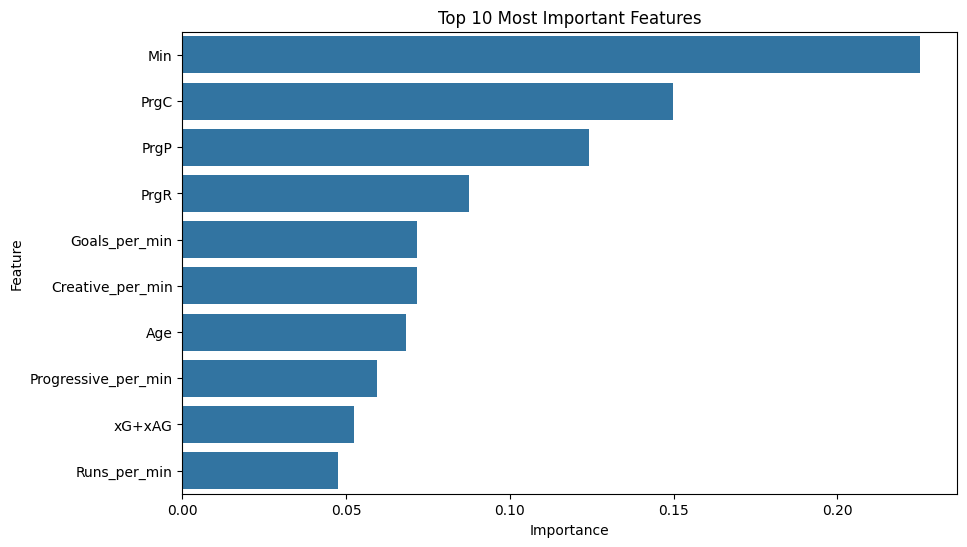

In [66]:
# Verification
print(f"\nVerification:")
print(f"- Total candidates found: {len(top_candidates)}")
print(f"- Highest probability: {top_candidates['Barca_Probability'].max():.3f}")
print(f"- Average probability: {top_candidates['Barca_Probability'].mean():.3f}")
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [67]:
print(f"- Unique squads in top 10: {top_candidates.head(10)['Squad'].unique()}")


- Unique squads in top 10: ['Milan' 'Juventus' 'Liverpool' 'Leverkusen' 'Inter' 'Dortmund' 'Sevilla'
 'Tottenham']


In [68]:
top_candidates.to_csv("barca_like_players.csv", index=False)